In [1]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import time
import matplotlib.pyplot as plt
from MLP import MLP

In [2]:
def one_hot_encoding(input_matrix):
    numclass=np.max(input_matrix,axis=0)
    matrix=np.zeros((len(input_matrix),int(np.sum(numclass))))
    for idx_row,row in enumerate(input_matrix):
        for idx_column,value in enumerate(row):
            matrix[idx_row,int(np.sum(numclass[:idx_column]))+int(value)-1]=1
    return matrix

# Monk 1

In [3]:
data_monk=np.loadtxt("../../data/MONK/monks-1.train",usecols=range(0,7))
labels=np.reshape(data_monk[:,0],(len(data_monk),1))
input_data=data_monk[:,1:]
input_data=one_hot_encoding(input_data)



data_monk_val=np.loadtxt("../../data/MONK/monks-1.test",usecols=range(0,7))
val_labels=np.reshape(data_monk_val[:,0],(len(data_monk_val),1))
val_data=data_monk_val[:,1:]
val_data=one_hot_encoding(val_data)

In [156]:
structure=[4,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1)]
start=[0.3,0.3]

netw = MLP(structure, func=act_func,
           starting_points=start)

In [157]:
learning_rate=0.8
lamb=0
N_epoch=1000
alpha=0.8
nesterov=False
batch_size=10
netw.train(input_data, labels, val_data, val_labels,
        epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
        nesterov=nesterov,batch_size=batch_size)

Epoch 1000:  [train MEE = 0.0183]  [val MEE = 0.0217]                              
Elapsed time: 2.6091248989105225 s


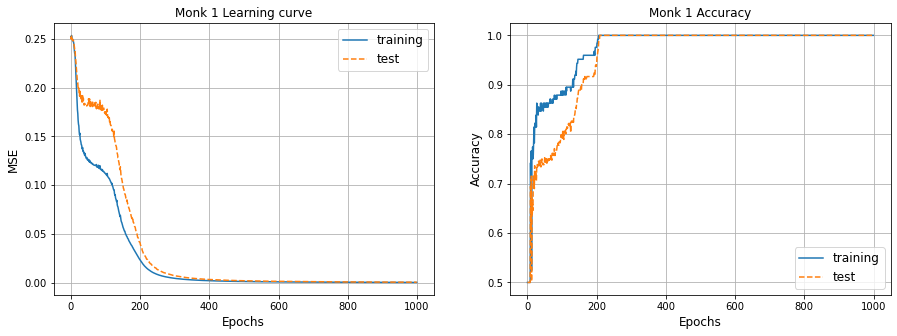

In [158]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)
x = np.arange(len(netw.train_MEE))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,netw.train_MSE,label="training")
plt.plot(x,netw.val_MSE,"--",label="test")
plt.title("Monk 1 Learning curve")
plt.xlabel("Epochs",fontsize="large")
plt.ylabel("MSE",fontsize="large")
plt.grid()
plt.legend(fontsize="large")

plt.subplot(122)
plt.plot(x,netw.train_accuracy,label="training")
plt.plot(x,netw.val_accuracy,"--",label="test")
plt.title ("Monk 1 Accuracy")
plt.ylabel("Accuracy",fontsize="large")
plt.xlabel("Epochs",fontsize="large")
plt.legend(fontsize="large")
plt.grid()

In [162]:
accuracy=[]
mse_tr=[]
mse_val=[]

In [163]:
for i in range(60):
        print("Try: ",i)
        netw = MLP(structure, func=act_func,
                starting_points=start)
        netw.train(input_data, labels, val_data, val_labels,
                epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
                nesterov=nesterov,batch_size=batch_size,verbose=False)
        accuracy.append(netw.val_accuracy[-1])
        mse_tr.append(netw.train_MSE[-1])
        mse_val.append(netw.val_MSE[-1])
        print("Accuracy: ",accuracy[-1])
        print("mean_std: ",np.mean(accuracy), " ", np.std(accuracy),"\n")

Try:  0
Epoch 1000:  [train MEE = 0.0765]  [val MEE = 0.0991]                              
Elapsed time: 1.697188138961792 s
Accuracy:  0.9166666666666666
mean_std:  0.9166666666666666   0.0 

Try:  1
Epoch 1000:  [train MEE = 0.0188]  [val MEE = 0.0234]                              
Elapsed time: 1.678220272064209 s
Accuracy:  1.0
mean_std:  0.9583333333333333   0.041666666666666685 

Try:  2
Epoch 1000:  [train MEE = 0.0144]  [val MEE = 0.0181]                              
Elapsed time: 1.6836051940917969 s
Accuracy:  1.0
mean_std:  0.9722222222222222   0.039283710065919325 

Try:  3
Epoch 1000:  [train MEE = 0.0313]  [val MEE = 0.0382]                              
Elapsed time: 1.6822190284729004 s
Accuracy:  1.0
mean_std:  0.9791666666666666   0.03608439182435163 

Try:  4
Epoch 1000:  [train MEE = 0.0907]  [val MEE = 0.1195]                              
Elapsed time: 1.6999428272247314 s
Accuracy:  0.9166666666666666
mean_std:  0.9666666666666666   0.04082482904638632 

Try:  

In [164]:
print(f"Accuracy: {np.mean(accuracy)} +- {np.std(accuracy)}\n MSE_tr: {np.mean(mse_tr)} +- {np.std(mse_tr)}\n MSE_val: {np.mean(mse_val)} +- {np.std(mse_val)}")

Accuracy: 0.9805555555555555 +- 0.03838965266968127
 MSE_tr: 0.014720847275311333 +- 0.027629528537050013
 MSE_val: 0.020206982483464142 +- 0.03798104697014562


(array([ 1.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0., 47.]),
 array([0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
        0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
        1.        ]),
 <BarContainer object of 10 artists>)

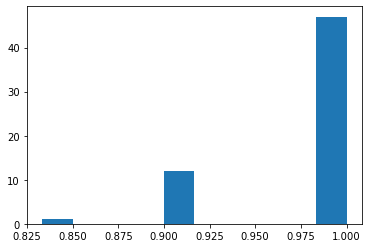

In [165]:
plt.hist(accuracy)